### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [243]:
data = pd.read_csv('data/coupons.csv')

In [244]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [245]:
#get the number of rows and columns
data.shape # (12684, 26)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [246]:
#check for NaN values in the data frame
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [247]:
#get the unique values for all the columns
for col in data.columns:
    print(f'{col} unique values: {data[col].unique()}')

destination unique values: ['No Urgent Place' 'Home' 'Work']
passanger unique values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather unique values: ['Sunny' 'Rainy' 'Snowy']
temperature unique values: [55 80 30]
time unique values: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon unique values: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration unique values: ['1d' '2h']
gender unique values: ['Female' 'Male']
age unique values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus unique values: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children unique values: [1 0]
education unique values: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation unique values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Techni

In [264]:
#check for duplicates in the dataset. 
data[data.duplicated()]
#No duplicates detected, as the reported duplicates could be for different \ 
# survey participants (as no unique personl locator is available in the dataset)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,do not drive,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,do not drive,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,do not drive,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,do not drive,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,do not drive,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,do not drive,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,do not drive,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,do not drive,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,do not drive,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [249]:
#get the columns names so that they can be used in the fillna('') call
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

3. Decide what to do about your missing data -- drop, replace, other...

In [250]:
#replace all NaN values with 'never' in all columns except in the car column
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] \
= data[['Bar', 'CoffeeHouse',       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]\
.fillna('never')

#replace all NaN values with in the car column with 'do not drive'
data[['car']] = data[['car']].fillna('do not drive')

#check for NaN values in the corrected dataset
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [251]:
data['Y'].value_counts()   #  1: 7210   0:5474
data.query("Y == 1")['Y'].value_counts() / data.shape[0]  
#56.84% of the observations chose to accept the coupon

Y
1    0.568433
Name: count, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

In [252]:
data[['coupon']].groupby('coupon').value_counts()  

coupon
Bar                      2017
Carry out & Take away    2393
Coffee House             3996
Restaurant(20-50)        1492
Restaurant(<20)          2786
Name: count, dtype: int64

In [253]:
data[['Y', 'coupon']].groupby('coupon').value_counts()  

coupon                 Y
Bar                    0    1190
                       1     827
Carry out & Take away  1    1760
                       0     633
Coffee House           0    2001
                       1    1995
Restaurant(20-50)      0     834
                       1     658
Restaurant(<20)        1    1970
                       0     816
Name: count, dtype: int64

Text(0.5, 1.0, 'Acceptance percentage by Coupon Type')

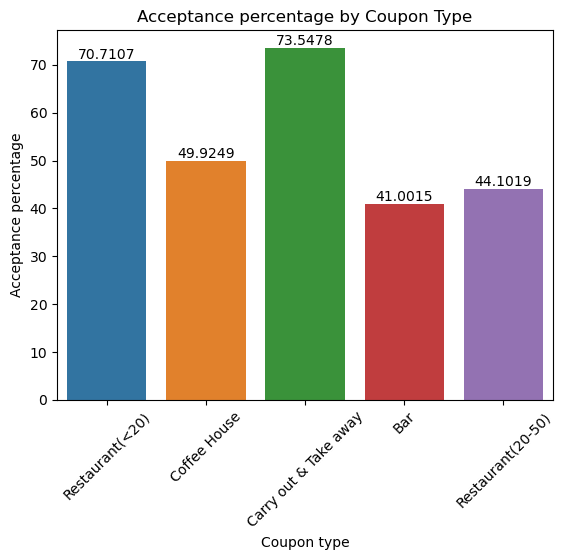

In [254]:
#ax = sns.catplot(data=data, x="coupon", kind="count")

ax = sns.barplot(x=data['coupon'], y=data['Y']*100, data=data, errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
  
plt.xticks(rotation=45)
plt.xlabel("Coupon type")
plt.ylabel("Acceptance percentage")
plt.title("Acceptance percentage by Coupon Type")

6. Use a histogram to visualize the temperature column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


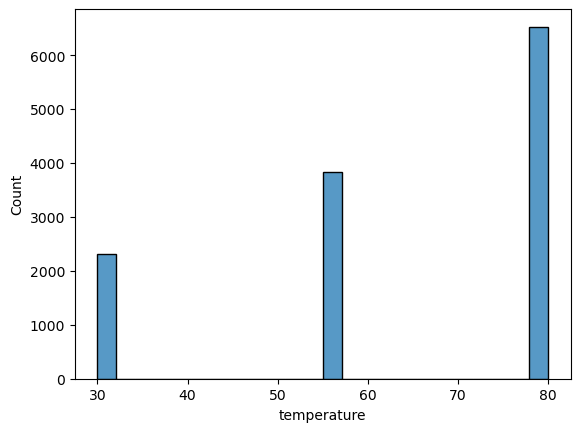

In [255]:
#ax = data['temperature'].plot(x='temperature', kind='hist')
ax = sns.histplot(data=data, x='temperature')
#data['temperature'].value_counts()   #check

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [256]:
dfbar = data.query("coupon == 'Bar'")
dfbar #2017 rows 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,do not drive,never,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,do not drive,never,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,do not drive,never,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,do not drive,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,do not drive,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,do not drive,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,do not drive,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,do not drive,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,do not drive,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [257]:
dfbar = data.query("coupon == 'Bar'")
dfbar.query("Y == 1")['Y'].value_counts() #827
dfbar.shape[0]  #2017
dfbar.query("Y == 1")['Y'].value_counts() / dfbar.shape[0]
# 41% of the bar coupons were accepted

Y
1    0.410015
Name: count, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
dfbar[['Bar', 'Y']].groupby('Bar').value_counts()

Bar    Y
1~3    1    257
       0    140
4~8    1    117
       0     33
gt8    1     36
       0     13
less1  0    317
       1    253
never  0    687
       1    164
Name: count, dtype: int64

In [21]:
#Bar unique values: ['never' 'less1' '1~3' 'gt8' '4~8']
dfbar = data.query("coupon == 'Bar'")
dfbar.shape[0] #2017

AcceptanceRateForThoseWhoWentToABar3TimesOrFewer = dfbar[['Bar', 'Y']].query("Y == 1 and (Bar == 'never' or Bar == 'less1' or Bar == '1~3')").sum().iloc[1] / dfbar.shape[0]  #33.14%
AcceptanceRateForThoseWhoWentToABarMoreThan3Times = dfbar[['Bar', 'Y']].query("Y == 1 and (Bar == '4~8' or Bar == 'gt8')").sum().iloc[1] / dfbar.shape[0] #7.58%

ComparisonOfAcceptanceRates = AcceptanceRateForThoseWhoWentToABar3TimesOrFewer / AcceptanceRateForThoseWhoWentToABarMoreThan3Times
ComparisonOfAcceptanceRates  #4.405 times
# The "drivers who went to a bar 3 or fewer times a month" accepted the coupons at 4.4 times higher rate than the
#   "drivers who went more than 3 times to a bar."

#Checks##
#dfbar[['Bar', 'Y']].query("Y == 1 and (Bar == '1~3' or Bar == 'never' or Bar == 'less1')").value_counts() #674
#dfbar[['Bar', 'Y']].query("Y == 1 and (Bar == '1~3' or Bar == 'never' or Bar == 'less1')").sum()[1] #674
#dfbar[['Bar', 'Y']].query("Y == 1 and ~(Bar == '1~3' or Bar == 'never' or Bar == 'less1')").sum()[1] #153

#AcceptanceRateForThoseWhoWentToABar3TimesOrFewer
#AcceptanceRateForThoseWhoWentToABarMoreThan3Times


4.405228758169934

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [34]:
#Bar unique values: ['never' 'less1' '1~3' 'gt8' '4~8']
dfbar = data.query("coupon == 'Bar'")
AcceptanceRateFor25OrOldDriversWhoWentToABarMoreThanOncepm = \
  dfbar[['Bar', 'Y', 'age']].query("Y == 1 and (age in ('46', '26', '31', '41', '50plus', '36' )) \
  and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )").sum().iloc[1]/ dfbar.shape[0]  #14.48%

AcceptanceRateForAllOthers = (dfbar.shape[0] -  
  dfbar[['Bar', 'Y', 'age']].query("Y == 1 and (age in ('46', '26', '31', '41', '50plus', '36' )) \
  and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )").sum().iloc[1])/ dfbar.shape[0] #85.5%

ComparisonOfAcceptanceRates = AcceptanceRateFor25OrOldDriversWhoWentToABarMoreThanOncepm / AcceptanceRateForAllOthers
ComparisonOfAcceptanceRates  #0.1693

#The "acceptance rate of drivers who go to a bar more than once a month and are over the age of 25" is 0.17 times \
# compared to all others. i.e the acceptance rate for all others is 5.9 times that of the aforementioned cohort.


#Checks##
#AcceptanceRateFor25OrOldDriversWhoWentToABarMoreThanOncepm  #14.47%  count=292 
#AcceptanceRateForAllOthers #=85.52%  #RestOfTheDriversWhoAccepted #=535

#dfbar.query("Y == 1 and ~(age == '21' or age == 'below21') and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )") #292
#dfbar.query("Y == 1 and (age in ('46', '26', '31', '41', '50plus', '36' )) and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )")  #292
#dfbar.query("Y == 1") #827

0.1692753623188406

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [52]:
#passanger unique values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
#Bar unique values: ['never' 'less1' '1~3' 'gt8' '4~8']
dfbar = data.query("coupon == 'Bar'")
AcceptanceRateForDriversWithNonChildPsngrsWhoWentToABarMoreThanOncePM = \
  dfbar[['Bar', 'Y', 'passanger', 'occupation']].query("Y == 1 and (passanger not in ('Alone', 'Kid(s)')) \
  and (occupation not in ( 'farming', 'fishing', 'forestry')) \
  and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )").sum().iloc[1] / dfbar.shape[0]  #6.94%

AcceptanceRateForForAllOthers = (dfbar.shape[0] -  \
  dfbar[['Bar', 'Y', 'passanger', 'occupation']].query("Y == 1 and (passanger not in ('Alone', 'Kid(s)')) \
  and (occupation not in ( 'farming', 'fishing', 'forestry')) \
  and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )").sum().iloc[1])/ dfbar.shape[0]   #93.06%

ComparisonOfAcceptanceRates = (AcceptanceRateForDriversWithNonChildPsngrsWhoWentToABarMoreThanOncePM) / AcceptanceRateForForAllOthers
ComparisonOfAcceptanceRates  #.075

#The "drivers who go to bars more than once a month and had passengers that were not a kid, and had occupations other than \
# farming, fishing, or forestry" is 0.075 times compared to all others. i.e the acceptance rate for all others is about 
# 13.4 times that of the aforementioned cohort.


##Checks##
#AcceptanceRateForDriversWithNonChildPsngrsWhoWentToABarMoreThanOncePM  #6.94%   #=140 
#AcceptanceRateForForAllOthers #93.06%     #=687

#dfbar.query("Y == 1 and (passanger in ('Friend(s)', 'Partner')) and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )") #140
#dfbar.query("Y == 1 and (passanger not in ('Alone', 'Kid(s)')) and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' ) and (occupation not in ( 'farming', 'fishing', 'forestry'))" )  #140
#dfbar.query("Y == 1") #827

0.07458710708577518

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [67]:
#passanger unique values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
#Bar unique values: ['never' 'less1' '1~3' 'gt8' '4~8']
#maritalStatus unique values: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
#age unique values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
#income unique values: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
# '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
# 'Less than $12500']
#RestaurantLessThan20 unique values: ['4~8' '1~3' 'less1' 'gt8' 'never']

dfbar = data.query("coupon == 'Bar'")
AcceptanceRateForNonWidowedDriversWithNonChildPsngrsWhoWentToABarMoreThanOncePM = \
  dfbar[['Bar', 'Y', 'passanger', 'maritalStatus']].query("Y == 1 and (passanger not in ('Alone', 'Kid(s)')) \
  and (maritalStatus != 'Widowed') \
  and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )").sum().iloc[1] \
/ dfbar.shape[0]  #6.94%

AcceptanceRateForDriversUnder30WhoWentToABarMoreThanOncePM = \
  dfbar[['Bar', 'Y', 'age']].query("Y == 1 \
  and (age in ('below21', '21', '26')) \
  and (Bar == '1~3' or Bar == '4~8' or Bar == 'gt8' )").sum().iloc[1] \
/ dfbar.shape[0]  #4.36%

# cheap restaurants => RestaurantLessThan20
AcceptanceRateForDriversMkingLessThan50KWhoWentToACheapRestrMoreThan4Times = \
  data[['Y', 'income', 'RestaurantLessThan20' ]].query("Y == 1 \
  and (income in ('Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999')) \
  and (RestaurantLessThan20 in ('4~8', 'gt8') )").sum().iloc[0] \
/ data.query("Y == 1").shape[0]  #18.98%

# The acceptance rate for cohort 1 (drivers who go to bars more than once a month, had passengers that were not a kid, \
#   and were not widowed) is 6.94%.
# The acceptance rate for cohort 2 (drivers who go to bars more than once a month and are under the age of 30) is 4.36% 
# The acceptance rate for cohort 3 (drivers who go to cheap restaurants more than 4 times a month and income is less \
#   than 50K) is 18.98%
# So the acceptance rate for cohort 3 is 2.7 times that of cohort 1 and 4.35 times that of cohort 2.
# Similarly the acceptance rate for cohort 1 is 1.59 times that of cohort 2.
# In ranking them in descending order, in terms of acceptance rates, it is cohort 3, then cohort 1 and then cohort 2. \
#   This makes sense as the lowest acceptance rate is among younger people under 30 who may not be interesting in using \ 
#   coupons and saving money.

#Checks##
#AcceptanceRateForNonWidowedDriversWithNonChildPsngrsWhoWentToABarMoreThanOncePM  #0.06941001487357462
#AcceptanceRateForDriversUnder30WhoWentToABarMoreThanOncePM #0.0436291522062469
#AcceptanceRateForDriversMkingLessThan50KWhoWentToACheapRestrMoreThan4Times #0.189875173370319  #1369/7210

0.189875173370319

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#The data shows that the acceptance of coupons for bars (41%) much lower than that for carry-out (73.5%) and cheap 
#  restaurants costing under $20 (70.7%), while the acceptance rate of coupons for costly restautants (44.1%), and 
#  coffee houses (49.9%) was comparable to that of the bars. This could be because drivers who purchase from the 
#  first two outlets are culturally oriented towards saving money or have the practical need to cut costs by using coupons.

#Also, drivers who frequented bars less (less than 3 times) accepted the coupons more readily than drivers who went to the
#  bars more. This could imply that the regular patrons of the bars didn't care too much for coupons. On a similar vein, 
#  drivers who went to bars more than once,and were no in Farming or Fishing or Forestry industries and had a passenger 
#  (who was not a kid) didn't bother to accept coupons at all. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [259]:
dfcoffee = data.query("coupon == 'Coffee House'")  #3996 rows
dfcoffee
dfcoffee[['Y']].groupby('Y').value_counts()  # 0:2001,  1:1995
dfcoffee.query("Y == 1") 
#proportion of coffee coupons that were accepted
dfcoffee.shape[0]  #2017
dfcoffee.query("Y == 1")['Y'].value_counts() / dfcoffee.shape[0]  #49.92% were accepted

Y
1    0.499249
Name: count, dtype: float64

In [261]:
#CoffeeHouse unique values: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
#dfcoffee[['CoffeeHouse','Y']].groupby('Y').value_counts()
pd.set_option('display.max_rows', 100)
dfcoffee[['CoffeeHouse','Y']].groupby('Y').value_counts().sort_index()

Y  CoffeeHouse
0  1~3            367
   4~8            169
   gt8            117
   less1          557
   never          791
1  1~3            675
   4~8            369
   gt8            225
   less1          518
   never          208
Name: count, dtype: int64

In [262]:
pd.set_option('display.max_rows', 10)

In [263]:
AcceptanceRateForCoffeeLikers = dfcoffee[['Y', 'temperature', 'destination', 'passanger', 'weather', 'time', \
                                          'expiration', 'age', 'CoffeeHouse' ]].query("Y == 1 \
  and (weather == 'Sunny') \
  and (CoffeeHouse in ('1~3', '4~8', 'gt8')) \
  ").sum().iloc[0] / dfcoffee.shape[0]    #28.25%


AcceptanceRateForForAllOthers = (dfcoffee.shape[0] - \
  dfcoffee[['Y', 'temperature', 'destination', 'passanger', 'weather', 'time', \
  'expiration', 'age', 'CoffeeHouse' ]].query("Y == 1 \
  and (weather == 'Sunny') \
  and (CoffeeHouse in ('1~3', '4~8', 'gt8')) \
  ").sum().iloc[0] ) / dfcoffee.shape[0]   #71.75%                        

ComparisonOfAcceptanceRates = (AcceptanceRateForCoffeeLikers) / AcceptanceRateForForAllOthers
ComparisonOfAcceptanceRates  #0.39 times

# Cohort 1: People who have been to a coffee house more than once and who get the coupon on a sunny day.
# The coupon acceptance rate for the people in this cohort is 28.25% compared to 71.75% for the rest. In other words, \
# people not in the cohort tend to accept the coffee coupon 2.53 times more than those in the cohort.
#
# When considered singly, the factors of Education, Income, Temperature, and Occupation don't significantly influence \
# the Coffee Coupon's acceptance. People who received the coupon when the temperature was higher (80 degrees) had a \
# slightly higher acceptance rate of 52.98% compared to those who received it when it was not so hot.
#
# Other observations:
# 1. The Coffee House coupons were generally sent to a predominantly non-driving population as per the data. 
# 2. People with "no urgent place" as a destination accepted coupons more (58.09%) as expected.
# 3. Coupons with expiry of 1d had a better acceptance rate than those expiring in 2h.


#Checks##
#AcceptanceRateForCoffeeLikers  #count=1129
#AcceptanceRateForForAllOthers  #count=2867

#AcceptanceRateForForAllOthers = (dfcoffee.shape[0] -  \
# dfcoffee[['Y', 'temperature', 'destination', 'passanger', 'weather', 'time', 'expiration', 'age' ]].query("Y == 1 \
#  and (temperature == 80) \  #31.8
#  and (destination == 'No Urgent Place') \  #31.33
#  and (passanger in ('Friend(s)', 'Partner')) \  #22.67
#  and (weather == 'Sunny') \  #43.69
#  and (time in ('10AM', '2PM')) \  #25.3
#  and (expiration == '1d') \  #25.8
#  and (CoffeeHouse in ('1~3', '4~8', 'gt8')) \ #31.76
#  and (age =='21' or age=='26')  \  #22.4
#  "").sum().iloc[0] / dfcoffee.shape[0]  


0.3937914196023718